In [1]:
#download nltk
#import nltk
#nltk.download()

In [2]:
messages=[line.rstrip() for line
         in open('SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for message_no,message in enumerate(messages[:10]):
    print(message_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

# extraction of dataset

In [4]:
import pandas as pd

In [5]:
#we use a tab as a separator \t

In [6]:
messages=pd.read_csv('SMSSpamCollection',sep='\t',names=["label","messages"])

In [7]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# exploratory data analysis

In [8]:
messages.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
#groupby used to describe by the label. its used  to separate ham and spam

In [10]:
messages.groupby('label').describe().transpose

<bound method DataFrame.transpose of       messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4>

In [11]:
#feature engineering

In [12]:
messages['length']=messages['messages'].apply(len)
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# data visualisation

In [13]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
messages.max()

label                                                    spam
messages    … we r stayin here an extra week, back next we...
length                                                    910
dtype: object

In [15]:
messages[messages['length']== messages['length'].max()]
 

,label,messages,length
1085,ham,For me the love should start with attraction.i...,910


In [16]:
messages[messages['length'] == 910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC4E607518>,
      dtype=object)

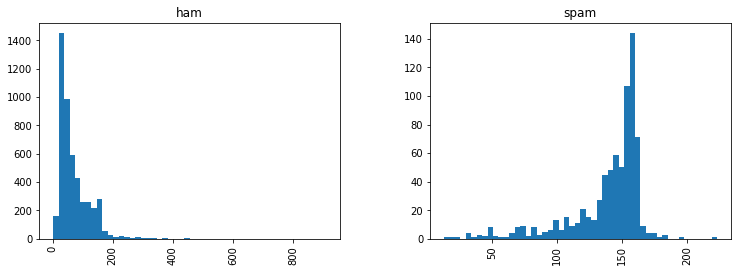

In [18]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

# Text processing

In [19]:
import string
mess='Sample message!Notice:it has punctuation.'
#check the characters in the punctuation
nopunc=[char for char in mess if char not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [20]:
nopunc=''.join(nopunc)
nopunc

'Sample messageNoticeit has punctuation'

#  tokenization:-To remove the stop words

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

In [ ]:
nopunc.split()

In [ ]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
clean_mess

In [ ]:
#takes in astring:-
#remove punctuation
#remove stopwords
def text_process(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
    

In [ ]:
text_process('A string with! and @ marks.')

In [ ]:
messages.head()

In [ ]:
messages['messages'].head().apply(text_process)

In [ ]:
messages['messages'].head(5).apply(text_process)

# vectorisation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['messages'])
#print total number of vocab words
print(len(bow_transformer.vocabulary_))

In [ ]:
messages3=messages['messages'][2]
print(messages3)

In [ ]:
#the vector representation

In [ ]:
bow3=bow_transformer.transform([messages3])
print(bow3)
print(bow3.shape)

In [ ]:
#the word that appear once and twice

print(bow_transformer.get_feature_names()[73])
print(bow_transformer.get_feature_names()[6331])


Now we can use .transform on our Bag-of-Words (bow) transformed object and transform 
the entire DataFrame of messages. Let's go ahead and check out how 
the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [ ]:
messages_bow = bow_transformer.transform(messages['messages'])

In [ ]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

In [ ]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))-

# tf-idf format values of each word

After the counting, the term weighting and normalization can be done with TF-IDF,
using scikit-learn's TfidfTransformer.

Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03.
Now, assume we have 10 million documents and the word cat appears in one thousand of these. 
Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4.
Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
    

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf3 = tfidf_transformer.transform(bow3)
print(tfidf3)

  (0, 11123)	0.19104387220509106
  (0, 11084)	0.15898145347176754
  (0, 10686)	0.13995540820792943
  (0, 10512)	0.2118842499614227
  (0, 9252)	0.16121646071144807
  (0, 9200)	0.22538631044314436
  (0, 9159)	0.22538631044314436
  (0, 6557)	0.18466951562322612
  (0, 6331)	0.347904654589528
  (0, 5619)	0.1887440015250524
  (0, 4731)	0.16452475271486866
  (0, 3953)	0.1544015632869991
  (0, 2804)	0.17524194104333074
  (0, 1941)	0.1526581729225716
  (0, 1833)	0.4507726208862887
  (0, 1551)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 443)	0.2177823443125605
  (0, 430)	0.2177823443125605
  (0, 423)	0.09639170919810956
  (0, 73)	0.22538631044314436


We'll go ahead and 
check what is the IDF (inverse document frequency) of the word "u" and of word "university"?

In [44]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [45]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


the economic activity is Agriculture the idf of 'c'and of word 'agriculture'

In [46]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['c']])
#print(tfidf_transformer.idf_[bow_transformer.vocabulary_['agriculture']])

5.775541185859478


# TRAINING MODEL

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [49]:
print('predicted:', spam_detect_model.predict(tfidf3)[0])

predicted: spam


In [50]:
print('expected:', messages.label[3])

expected: ham


# TRAIN TEST SPLIT

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['messages'], messages['label'], test_size=0.2)


In [53]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))


4457 1115 5572


# the test size is 20% of the entire dataset(1115 messages out of total 5572),and the training is the rest (4457 of 5572).note the default split would have 30/70.

# creating a pipeline

In [54]:
from sklearn.pipeline import Pipeline


In [56]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [57]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001FC54317048>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [58]:
predictions=pipeline.predict(msg_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1019
        spam       0.71      1.00      0.83        96

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115

